In [1]:
import sqlite3
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# only need to run this command once
# nltk.download('punkt')

In [3]:
conn = sqlite3.connect('../SkyrimLibrary.db')
cursor = conn.cursor()

df = pd.read_sql(
    sql='select * from Book',
    con=conn
)

In [4]:
df

ID                          Title  Value  \
0      1   16 Accords of Madness, v. VI     25   
1      2   16 Accords of Madness, v. IX     25   
2      3  16 Accords of Madness, v. XII     25   
3      4         2920, Morning Star, v1     50   
4      5           2920, Sun's Dawn, v2     60   
..   ...                            ...    ...   
493  494   Words of Clan Mother Ahnissi     14   
494  495         Wraith's Wedding Dowry     10   
495  496            Wyndelius's Journal     40   
496  497         Yellow Book of Riddles      3   
497  498       Yngol and the Sea-Ghosts      5   

                                         Author  \
0                                                 
1                                                 
2                                                 
3                              Carlovac Townway   
4                              Carlovac Townway   
..                                          ...   
493                         Clan Mother Ahnissi   
494  Voltha gra-Yamwort(translated by Apthorne)   
495                         Wyndelius Gatharian   
496                                               
497                                               

                                           Description                   Type  \
0                                       Hircine's Tale                          
1                                      Vaermina's Tale                          
2                                      Malacath's Tale                          
3    Volume 1 of a historical series about Vivec an...  One-handed skill book   
4    Volume 2 of a historical series about Vivec an...    Illusion skill book   
..                                                 ...                    ...   
493     How a Khajiit explains the origin of the world                          
494  Story of how an Orc reclaims her wedding gift ...                          
495  A journal documenting a treasure-hunter's desc...                          
496                                A series of riddles                          
497    A tale of Ysgramor's first adventure in Tamriel                          

                                               Content  
0    \nver proud and boastful, Oblivion's Mad Princ...  
1    \narius Shano found himself running as fast as...  
2    \nn the days before the Orsinium's founding, t...  
3    \n\n1 Morning Star, 2920\nMournhold, Morrowind...  
4    \n\n3 Sun's Dawn, 2920\nThe Isle of Artaeum, S...  
..                                                 ...  
493  \nhnissi tells you. You are no longer a mewing...  
494  \n"The poets are right. There is something lif...  
495  \n4E 200, 18 Morning Star\nI've set up camp in...  
496  \nor earnest pleasure, and the strengthening o...  
497  \nasser and Secunda passed over Ysgramor's peo...  

[498 rows x 7 columns]

## Remove newline characters from Content

In [5]:
df['Content'] = df['Content'].apply(lambda x: x.replace('\n', ''))
df

ID                          Title  Value  \
0      1   16 Accords of Madness, v. VI     25   
1      2   16 Accords of Madness, v. IX     25   
2      3  16 Accords of Madness, v. XII     25   
3      4         2920, Morning Star, v1     50   
4      5           2920, Sun's Dawn, v2     60   
..   ...                            ...    ...   
493  494   Words of Clan Mother Ahnissi     14   
494  495         Wraith's Wedding Dowry     10   
495  496            Wyndelius's Journal     40   
496  497         Yellow Book of Riddles      3   
497  498       Yngol and the Sea-Ghosts      5   

                                         Author  \
0                                                 
1                                                 
2                                                 
3                              Carlovac Townway   
4                              Carlovac Townway   
..                                          ...   
493                         Clan Mother Ahnissi   
494  Voltha gra-Yamwort(translated by Apthorne)   
495                         Wyndelius Gatharian   
496                                               
497                                               

                                           Description                   Type  \
0                                       Hircine's Tale                          
1                                      Vaermina's Tale                          
2                                      Malacath's Tale                          
3    Volume 1 of a historical series about Vivec an...  One-handed skill book   
4    Volume 2 of a historical series about Vivec an...    Illusion skill book   
..                                                 ...                    ...   
493     How a Khajiit explains the origin of the world                          
494  Story of how an Orc reclaims her wedding gift ...                          
495  A journal documenting a treasure-hunter's desc...                          
496                                A series of riddles                          
497    A tale of Ysgramor's first adventure in Tamriel                          

                                               Content  
0    ver proud and boastful, Oblivion's Mad Prince ...  
1    arius Shano found himself running as fast as h...  
2    n the days before the Orsinium's founding, the...  
3    1 Morning Star, 2920Mournhold, Morrowindlmalex...  
4    3 Sun's Dawn, 2920The Isle of Artaeum, Summurs...  
..                                                 ...  
493  hnissi tells you. You are no longer a mewing k...  
494  "The poets are right. There is something life-...  
495  4E 200, 18 Morning StarI've set up camp inside...  
496  or earnest pleasure, and the strengthening of ...  
497  asser and Secunda passed over Ysgramor's peopl...  

[498 rows x 7 columns]

## Combine all content into a single string for analysis

In [6]:
content = ''

for i in range(len(df)):
    content += df.iloc[i]['Content']
    
    if i < len(df) - 1:
        # add a space so the end of one book and the start of another aren't interpreted as one word
        content += ' '

In [7]:
content

'ver proud and boastful, Oblivion\'s Mad Prince stood one fifth day of mid year among the frigid peaks of Skyrim, and beckoned forth Hircine for parlay. The Huntsman God materialized, for this was his day, and the boldness of Sheogorath intrigued him.Wry without equal, Sheogorath holds in his realm giggling loons, flamboyant auteurs, and craven mutilators. The Mad Prince will ply profitless bargains and promote senseless bloodshed for nothing more than the joy of another\'s confusion, tragedy, or rage. So it was that Sheogorath had set a stage on which to play himself as rival to Hircine.Without haste, the coy Prince proffered his contest; each Prince was to groom a beast to meet at this place again, three years to the hour, and do fatal battle. Expressionless behind his fearsome countenance, Hircine agreed, and with naught but a dusting of snow in the drift, the Princes were gone to their realms.Confident, but knowing Sheogorath for a trickster, Hircine secretly bred an abomination in

## Tokenize the text.
TODO: remove stop words and punctuation before doing this

In [8]:
tokens = word_tokenize(content)
tokens

['ver',
 'proud',
 'and',
 'boastful',
 ',',
 'Oblivion',
 "'s",
 'Mad',
 'Prince',
 'stood',
 'one',
 'fifth',
 'day',
 'of',
 'mid',
 'year',
 'among',
 'the',
 'frigid',
 'peaks',
 'of',
 'Skyrim',
 ',',
 'and',
 'beckoned',
 'forth',
 'Hircine',
 'for',
 'parlay',
 '.',
 'The',
 'Huntsman',
 'God',
 'materialized',
 ',',
 'for',
 'this',
 'was',
 'his',
 'day',
 ',',
 'and',
 'the',
 'boldness',
 'of',
 'Sheogorath',
 'intrigued',
 'him.Wry',
 'without',
 'equal',
 ',',
 'Sheogorath',
 'holds',
 'in',
 'his',
 'realm',
 'giggling',
 'loons',
 ',',
 'flamboyant',
 'auteurs',
 ',',
 'and',
 'craven',
 'mutilators',
 '.',
 'The',
 'Mad',
 'Prince',
 'will',
 'ply',
 'profitless',
 'bargains',
 'and',
 'promote',
 'senseless',
 'bloodshed',
 'for',
 'nothing',
 'more',
 'than',
 'the',
 'joy',
 'of',
 'another',
 "'s",
 'confusion',
 ',',
 'tragedy',
 ',',
 'or',
 'rage',
 '.',
 'So',
 'it',
 'was',
 'that',
 'Sheogorath',
 'had',
 'set',
 'a',
 'stage',
 'on',
 'which',
 'to',
 'play'

## Get frequency of each token

In [9]:
fdist = FreqDist(tokens)
fdist

FreqDist({',': 25079, 'the': 24382, '.': 18323, 'of': 12334, 'and': 10205, 'to': 9996, 'a': 6968, '``': 5801, 'in': 4997, 'I': 4831, ...})

In [10]:
top_ten_list = fdist.most_common(10)
top_ten_list

[(',', 25079),
 ('the', 24382),
 ('.', 18323),
 ('of', 12334),
 ('and', 10205),
 ('to', 9996),
 ('a', 6968),
 ('``', 5801),
 ('in', 4997),
 ('I', 4831)]

## Turn the top 10 most used words into a dictionary for plotting

In [11]:
top_ten = {}

for item in top_ten_list:
    top_ten[item[0]] = item[1]
    
top_ten

{',': 25079,
 'the': 24382,
 '.': 18323,
 'of': 12334,
 'and': 10205,
 'to': 9996,
 'a': 6968,
 '``': 5801,
 'in': 4997,
 'I': 4831}

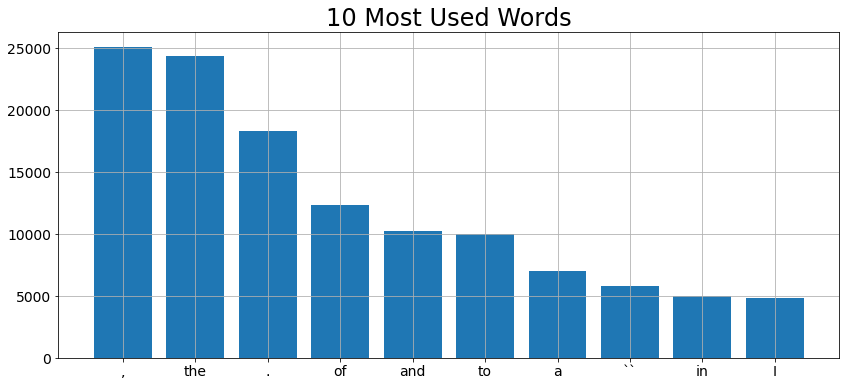

In [12]:
plt.figure(figsize=(14,6))
plt.bar(range(len(top_ten)), list(top_ten.values()), align='center')
plt.title('10 Most Used Words', fontsize=24)
plt.xticks(range(len(top_ten)), list(top_ten.keys()), fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [13]:
df.to_json()

'{"ID":{"0":1,"1":2,"2":3,"3":4,"4":5,"5":6,"6":7,"7":8,"8":9,"9":10,"10":11,"11":12,"12":13,"13":14,"14":15,"15":16,"16":17,"17":18,"18":19,"19":20,"20":21,"21":22,"22":23,"23":24,"24":25,"25":26,"26":27,"27":28,"28":29,"29":30,"30":31,"31":32,"32":33,"33":34,"34":35,"35":36,"36":37,"37":38,"38":39,"39":40,"40":41,"41":42,"42":43,"43":44,"44":45,"45":46,"46":47,"47":48,"48":49,"49":50,"50":51,"51":52,"52":53,"53":54,"54":55,"55":56,"56":57,"57":58,"58":59,"59":60,"60":61,"61":62,"62":63,"63":64,"64":65,"65":66,"66":67,"67":68,"68":69,"69":70,"70":71,"71":72,"72":73,"73":74,"74":75,"75":76,"76":77,"77":78,"78":79,"79":80,"80":81,"81":82,"82":83,"83":84,"84":85,"85":86,"86":87,"87":88,"88":89,"89":90,"90":91,"91":92,"92":93,"93":94,"94":95,"95":96,"96":97,"97":98,"98":99,"99":100,"100":101,"101":102,"102":103,"103":104,"104":105,"105":106,"106":107,"107":108,"108":109,"109":110,"110":111,"111":112,"112":113,"113":114,"114":115,"115":116,"116":117,"117":118,"118":119,"119":120,"120":121,